Plot saved successfully as 'sustainability_comparison.png'


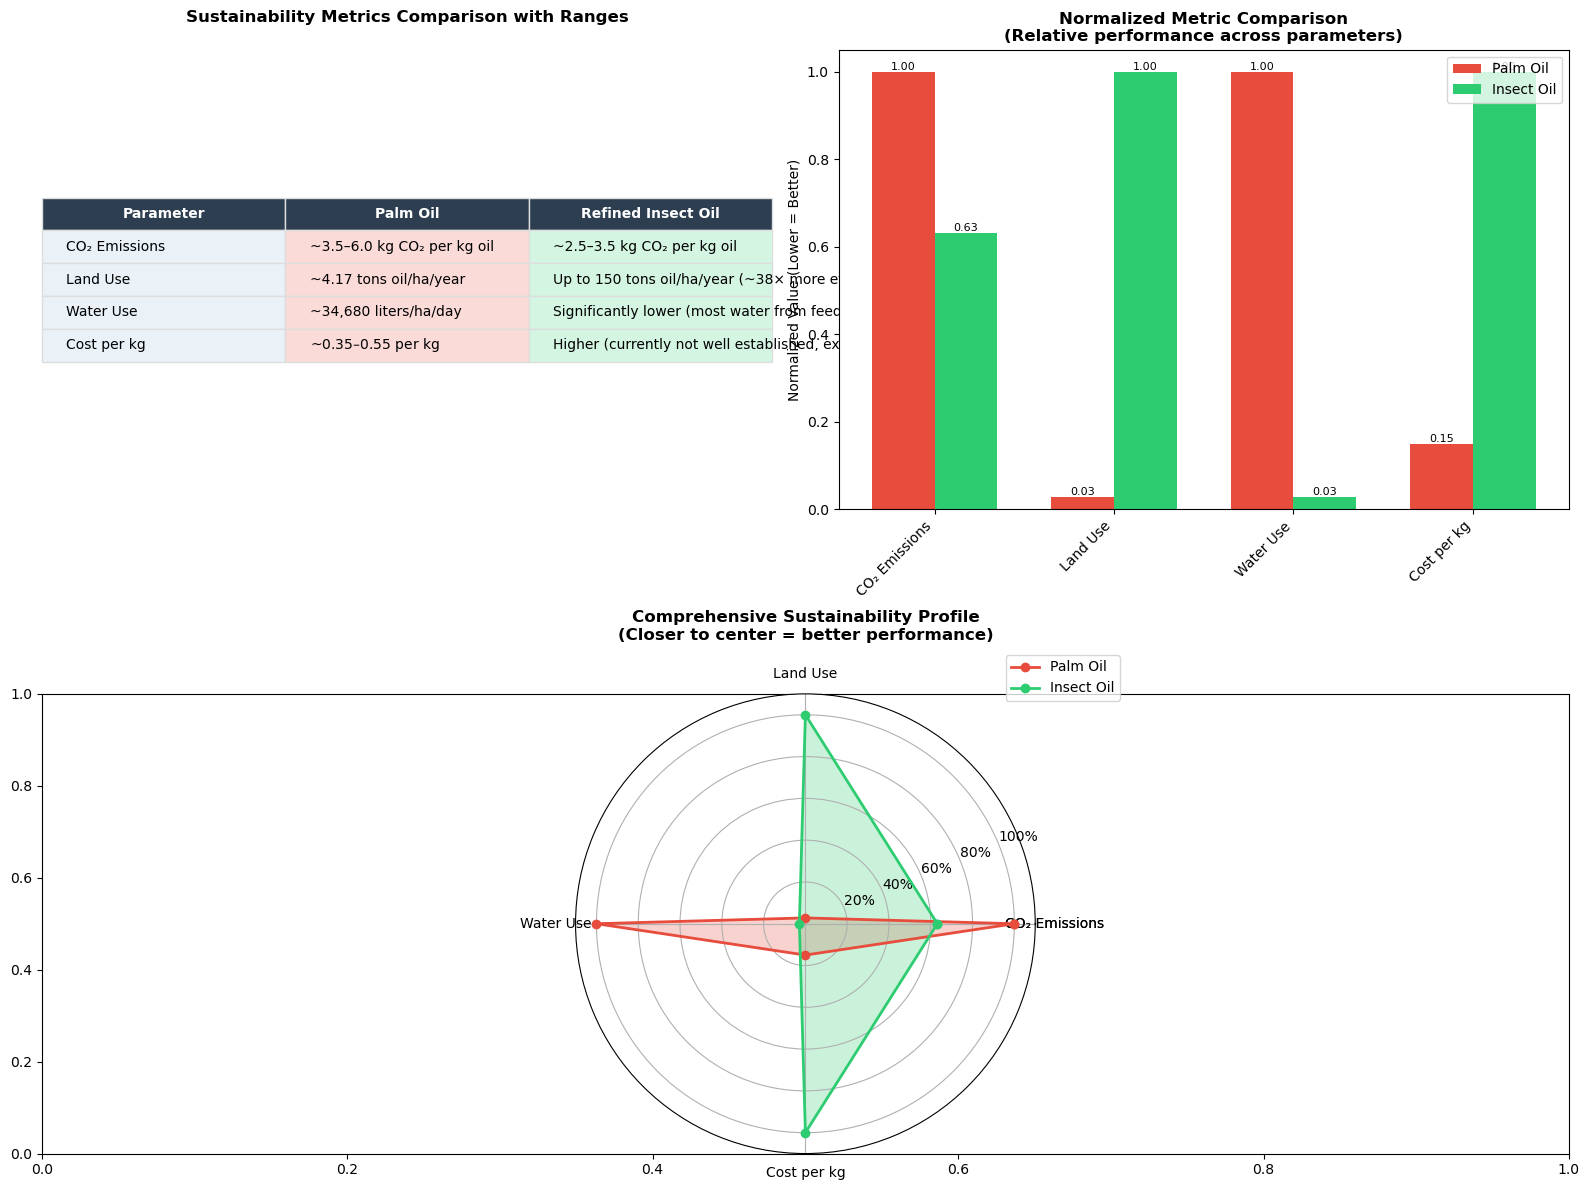

In [3]:
#method 1: 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

# Updated data with new ranges
data = [
    ["Parameter", "Palm Oil", "Refined Insect Oil"],
    ["CO₂ Emissions", "~3.5–6.0 kg CO₂ per kg oil", "~2.5–3.5 kg CO₂ per kg oil"],
    ["Land Use", "~4.17 tons oil/ha/year", "Up to 150 tons oil/ha/year (~38× more efficient)"],
    ["Water Use", "~34,680 liters/ha/day", "Significantly lower (most water from feed)"],
    ["Cost per kg", "~$0.35–$0.55 per kg", "Higher (currently not well established, expected to decrease with scale)"]
]

# Create figure with three subplots
plt.figure(figsize=(16, 12))  # Slightly taller figure for better spacing

# Table Visualization with enhanced colors
plt.subplot(221)
ax = plt.gca()
ax.axis('off')
ax.axis('tight')

# Create table with colored cells
table = ax.table(cellText=data[1:],
                 colLabels=data[0],
                 loc='center',
                 cellLoc='left',  # Left alignment for better readability
                 colColours=['#f8f9fa']*3)  # Light gray for columns

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.8)  # Increased scaling for better fit
plt.title('Sustainability Metrics Comparison with Ranges', pad=20, fontweight='bold')

# Color settings
header_color = '#2c3e50'  # Dark blue
palm_color = '#fadbd8'    # Light red
insect_color = '#d5f5e3'  # Light green

# Apply colors to cells
for (i, j), cell in table.get_celld().items():
    # Header row
    if i == 0:
        cell.set_facecolor(header_color)
        cell.set_text_props(color='white', weight='bold')
    # Parameter column
    elif j == 0:
        cell.set_facecolor('#eaf2f8')
    # Palm Oil column
    elif j == 1:
        cell.set_facecolor(palm_color)
    # Insect Oil column
    elif j == 2:
        cell.set_facecolor(insect_color)
    
    cell.set_edgecolor('#dddddd')

# Quantitative comparison chart (using midpoint values where ranges exist)
plt.subplot(222)
parameters = [row[0] for row in data[1:]]
palm_values = [4.75, 4.17, 34680, 0.45]  # Midpoints/representative values
insect_values = [3.0, 150, 1000, 3.0]    # Representative values

# Normalize for visualization (since units vary)
max_values = [max(p,i) for p,i in zip(palm_values, insect_values)]
palm_normalized = [v/m for v,m in zip(palm_values, max_values)]
insect_normalized = [v/m for v,m in zip(insect_values, max_values)]

x = np.arange(len(parameters))
width = 0.35
bars1 = plt.bar(x - width/2, palm_normalized, width, label='Palm Oil', color='#e74c3c')
bars2 = plt.bar(x + width/2, insect_normalized, width, label='Insect Oil', color='#2ecc71')

plt.title('Normalized Metric Comparison\n(Relative performance across parameters)', fontweight='bold')
plt.ylabel('Normalized Value (Lower = Better)')
plt.xticks(x, parameters, rotation=45, ha='right')
plt.legend()

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom', fontsize=8)

# Radar Chart (Normalized Comparison)
plt.subplot(212)
angles = np.linspace(0, 2*np.pi, len(parameters), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
palm_normalized_radar = np.concatenate((palm_normalized, [palm_normalized[0]]))
insect_normalized_radar = np.concatenate((insect_normalized, [insect_normalized[0]]))
parameters_radar = parameters + [parameters[0]]

ax = plt.subplot(212, polar=True)
ax.plot(angles, palm_normalized_radar, 'o-', linewidth=2, label='Palm Oil', color='#e74c3c')
ax.fill(angles, palm_normalized_radar, color='#e74c3c', alpha=0.25)
ax.plot(angles, insect_normalized_radar, 'o-', linewidth=2, label='Insect Oil', color='#2ecc71')
ax.fill(angles, insect_normalized_radar, color='#2ecc71', alpha=0.25)

ax.set_thetagrids(angles * 180/np.pi, parameters_radar)
ax.set_title('Comprehensive Sustainability Profile\n(Closer to center = better performance)', y=1.1, fontweight='bold')
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"])
ax.set_ylim(0, 1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))

# Adjust layout and save the figure
plt.tight_layout()

# Save the plot as high-quality PNG
save_path = "sustainability_comparison.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Plot saved successfully as '{save_path}'")

plt.show()

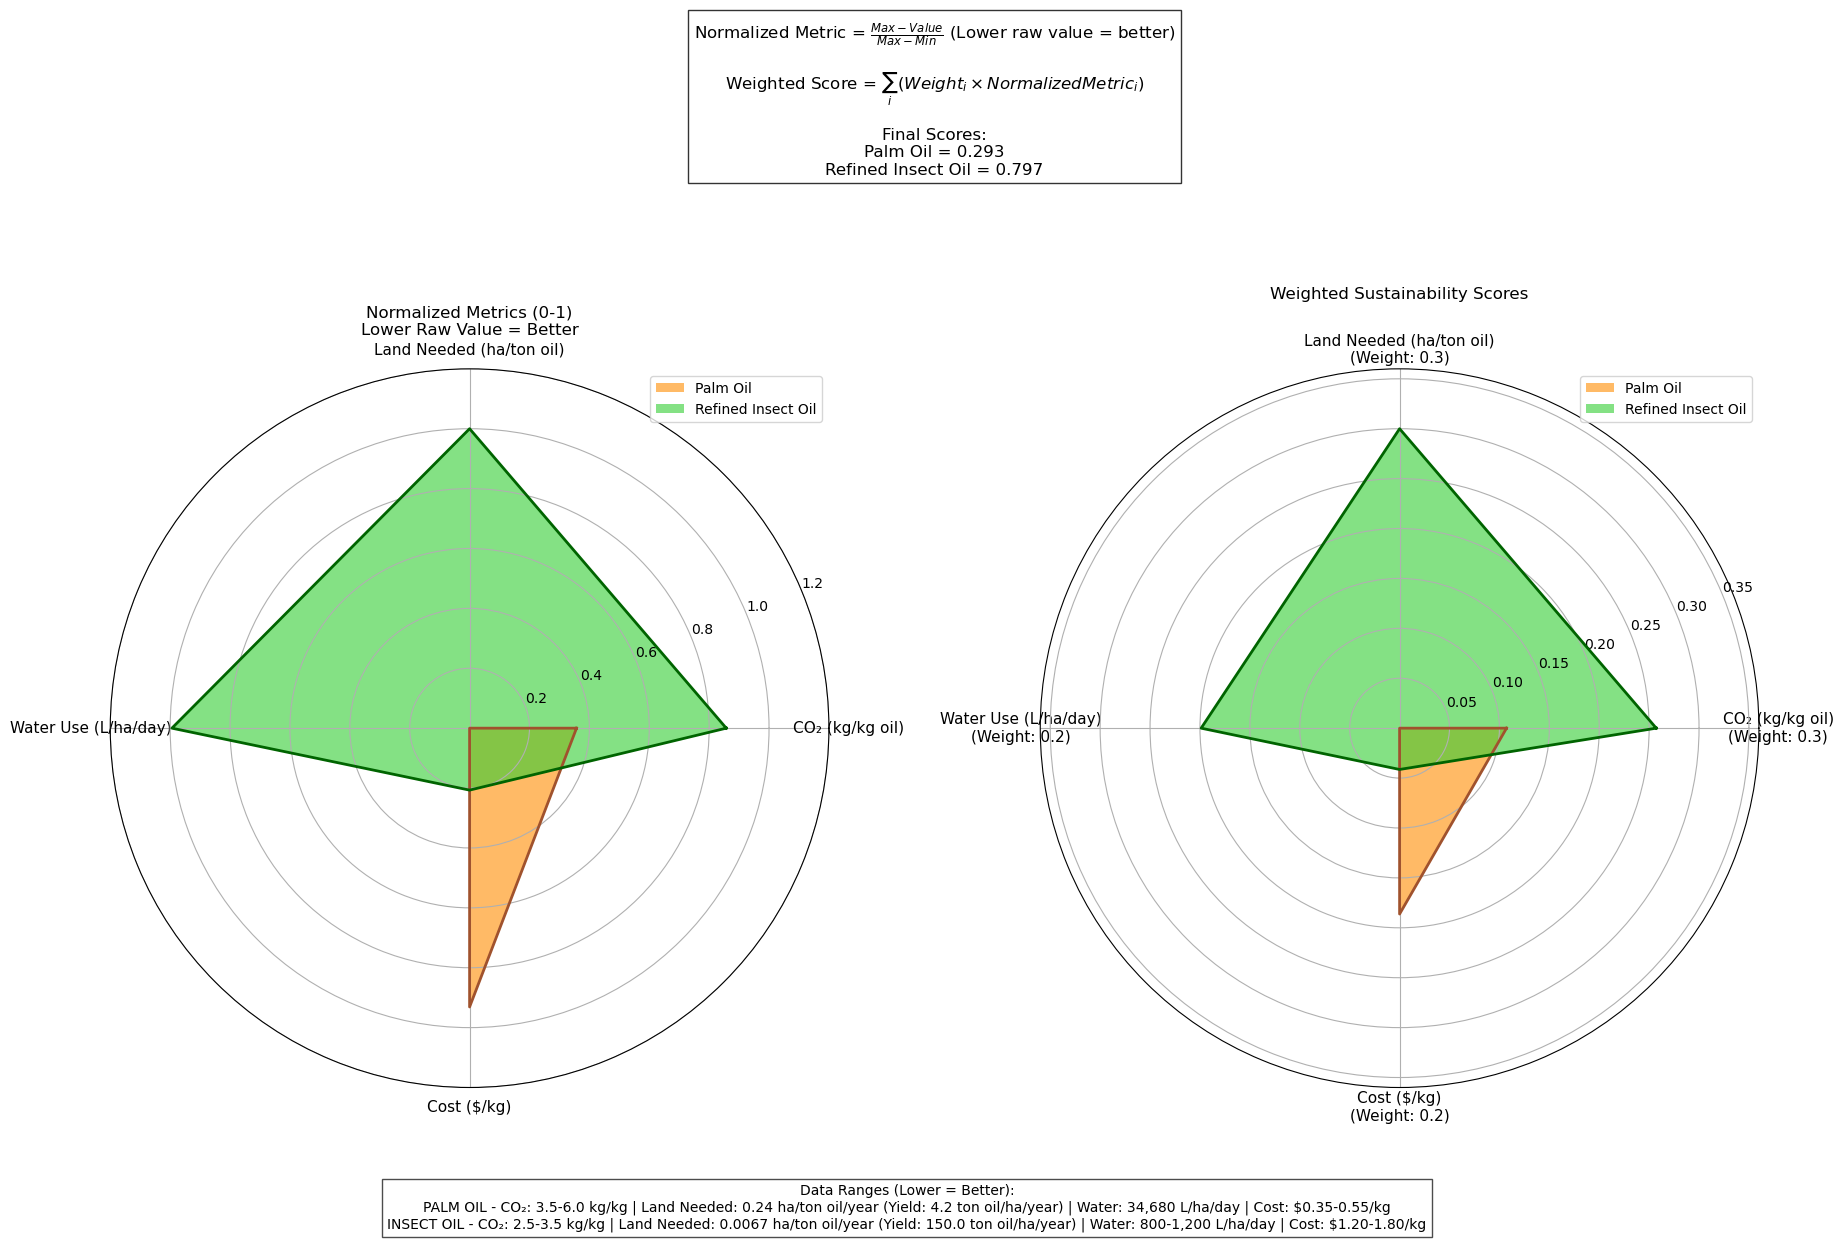

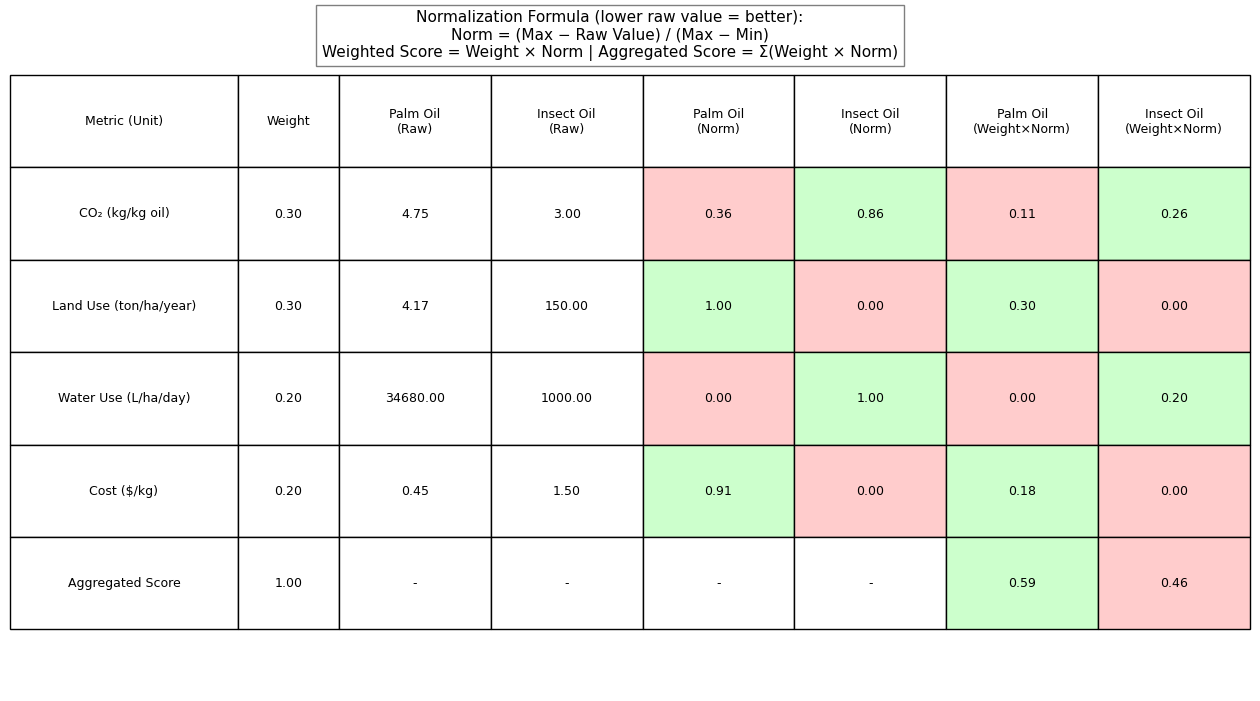

In [4]:
#method 2
import numpy as np
import matplotlib.pyplot as plt

# --- Data Definitions ---
data_ranges = {
    "Palm Oil": {
        "CO₂ (kg/kg oil)": (3.5, 6.0),
        "Land Use (ha/ton oil/year)": (1/4.17, 1/4.17),  # 4.17 ton oil/ha/year → ~0.24 ha/ton oil/year
        "Water Use (L/ha/day)": (34680, 34680),
        "Cost ($/kg)": (0.35, 0.55)
    },
    "Refined Insect Oil": {
        "CO₂ (kg/kg oil)": (2.5, 3.5),
        "Land Use (ha/ton oil/year)": (1/150, 1/150),    # 150 ton oil/ha/year → ~0.0067 ha/ton oil/year
        "Water Use (L/ha/day)": (800, 1200),
        "Cost ($/kg)": (1.20, 1.80)
    }
}

# --- Formulas ---
normalization_formula = r"Normalized Metric = $\frac{Max - Value}{Max - Min}$ (Lower raw value = better)"
weighted_score_formula = r"Weighted Score = $\sum_{i} (Weight_i \times Normalized Metric_i)$"

# --- Calculations ---
data_mid = {
    oil: {metric: np.mean(values) if isinstance(values, tuple) else values 
          for metric, values in data_ranges[oil].items()}
    for oil in data_ranges
}

def normalize(value, min_val, max_val):
    return (max_val - value) / (max_val - min_val) if max_val != min_val else 0.5

global_min = {metric: min(data_ranges["Palm Oil"][metric][0], 
              data_ranges["Refined Insect Oil"][metric][0]) 
              for metric in data_ranges["Palm Oil"]}

global_max = {metric: max(data_ranges["Palm Oil"][metric][1], 
              data_ranges["Refined Insect Oil"][metric][1]) 
              for metric in data_ranges["Palm Oil"]}

normalized_data = {
    oil: {metric: normalize(data_mid[oil][metric], global_min[metric], global_max[metric]) 
          for metric in data_mid[oil]}
    for oil in data_mid
}

weights = {
    "CO₂ (kg/kg oil)": 0.3,
    "Land Use (ha/ton oil/year)": 0.3,
    "Water Use (L/ha/day)": 0.2,
    "Cost ($/kg)": 0.2
}

weighted_data = {
    oil: {metric: normalized_data[oil][metric] * weights[metric] 
          for metric in normalized_data[oil]}
    for oil in normalized_data
}

scores = {oil: sum(weighted_data[oil].values()) for oil in weighted_data}

# --- Plotting ---
metrics = list(weights.keys())
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

# Create figure with adjusted layout
fig = plt.figure(figsize=(22, 14))  # Increased height to accommodate formula box
gs = fig.add_gridspec(2, 2, height_ratios=[1, 4], hspace=0.4)

# Add formula box in top row
ax_text = fig.add_subplot(gs[0, :])
ax_text.axis('off')
formula_text = (
    f"{normalization_formula}\n\n"
    f"{weighted_score_formula}\n\n"
    f"Final Scores:\n"
    f"Palm Oil = {scores['Palm Oil']:.3f}\n"
    f"Refined Insect Oil = {scores['Refined Insect Oil']:.3f}"
)
ax_text.text(0.5, 0.5, formula_text, ha='center', va='center', fontsize=12, 
            bbox=dict(facecolor='white', alpha=0.8))

# Radar plots in bottom row
ax1 = fig.add_subplot(gs[1, 0], polar=True)
ax2 = fig.add_subplot(gs[1, 1], polar=True)

colors = {
    "Palm Oil": {"fill": "darkorange", "line": "sienna"},
    "Refined Insect Oil": {"fill": "limegreen", "line": "darkgreen"}
}

# Plot 1: Normalized Values
for oil in ["Palm Oil", "Refined Insect Oil"]:
    values = [normalized_data[oil][m] for m in metrics] + [normalized_data[oil][metrics[0]]]
    ax1.fill(angles, values, colors[oil]["fill"], alpha=0.6, label=oil)
    ax1.plot(angles, values, color=colors[oil]["line"], linewidth=2)
    
ax1.set_title("Normalized Metrics (0-1)\nLower Raw Value = Better", pad=25)
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels([m.replace("Land Use (ha/ton oil/year)", "Land Needed (ha/ton oil)") 
                    for m in metrics], fontsize=11)
ax1.set_ylim(0, 1.2)
ax1.legend(loc='upper right')

# Plot 2: Weighted Scores
for oil in ["Palm Oil", "Refined Insect Oil"]:
    values = [weighted_data[oil][m] for m in metrics] + [weighted_data[oil][metrics[0]]]
    ax2.fill(angles, values, colors[oil]["fill"], alpha=0.6, label=oil)
    ax2.plot(angles, values, color=colors[oil]["line"], linewidth=2)
    
ax2.set_title("Weighted Sustainability Scores", pad=25)
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels([f"{m.replace('Land Use (ha/ton oil/year)', 'Land Needed (ha/ton oil)')}\n(Weight: {weights[m]})" 
                    for m in metrics], fontsize=11)
ax2.set_ylim(0, max(max(weighted_data["Palm Oil"].values()), 
               max(weighted_data["Refined Insect Oil"].values())) * 1.2)
ax2.legend(loc='upper right')

# Data footnote
data_note = (
    "Data Ranges (Lower = Better):\n"
    "PALM OIL - CO₂: 3.5-6.0 kg/kg | Land Needed: 0.24 ha/ton oil/year "
    f"(Yield: {1/data_mid['Palm Oil']['Land Use (ha/ton oil/year)']:.1f} ton oil/ha/year) | "
    "Water: 34,680 L/ha/day | Cost: $0.35-0.55/kg\n"
    "INSECT OIL - CO₂: 2.5-3.5 kg/kg | Land Needed: 0.0067 ha/ton oil/year "
    f"(Yield: {1/data_mid['Refined Insect Oil']['Land Use (ha/ton oil/year)']:.1f} ton oil/ha/year) | "
    "Water: 800-1,200 L/ha/day | Cost: $1.20-1.80/kg"
)
plt.figtext(0.5, 0.01, data_note, ha='center', fontsize=10, 
            bbox=dict(facecolor='white', alpha=0.7))

plt.savefig('sustainability_comparison_corrected.png', dpi=300, bbox_inches='tight')
plt.show()
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table

# Data (ranges and mid-points) with units
data_ranges = {
    "Palm Oil": {
        "CO₂ (kg/kg oil)": (3.5, 6.0),
        "Land Use (ton/ha/year)": (4.17, 4.17),
        "Water Use (L/ha/day)": (34680, 34680),
        "Cost ($/kg)": (0.35, 0.55)
    },
    "Refined Insect Oil": {
        "CO₂ (kg/kg oil)": (2.5, 3.5),
        "Land Use (ton/ha/year)": (150, 150),
        "Water Use (L/ha/day)": (1000, 1000),
        "Cost ($/kg)": (1.50, 1.50)
    }
}

# Mid-points for calculations
data_mid = {
    oil_type: {metric: np.mean(values) for metric, values in data_ranges[oil_type].items()}
    for oil_type in data_ranges
}

# Normalization function (lower raw value = better)
def normalize(value, min_val, max_val):
    return (max_val - value) / (max_val - min_val)

# Global min/max for normalization
global_min = {metric: min(data_ranges["Palm Oil"][metric][0], data_ranges["Refined Insect Oil"][metric][0]) for metric in data_ranges["Palm Oil"]}
global_max = {metric: max(data_ranges["Palm Oil"][metric][1], data_ranges["Refined Insect Oil"][metric][1]) for metric in data_ranges["Palm Oil"]}

# Normalized data
normalized_data = {
    oil_type: {
        metric: normalize(data_mid[oil_type][metric], global_min[metric], global_max[metric])
        for metric in data_mid[oil_type]
    }
    for oil_type in data_mid
}

# Weights (adjustable)
weights = {
    "CO₂ (kg/kg oil)": 0.3,
    "Land Use (ton/ha/year)": 0.3,
    "Water Use (L/ha/day)": 0.2,
    "Cost ($/kg)": 0.2
}

# Weighted normalized values
weighted_data = {
    oil_type: {
        metric: normalized_data[oil_type][metric] * weights[metric]
        for metric in normalized_data[oil_type]
    }
    for oil_type in normalized_data
}

# Aggregated scores
scores = {
    oil_type: sum(weighted_data[oil_type].values())
    for oil_type in weighted_data
}

# Create table data
table_data = [
    ["Metric (Unit)", "Weight", "Palm Oil\n(Raw)", "Insect Oil\n(Raw)", 
     "Palm Oil\n(Norm)", "Insect Oil\n(Norm)", "Palm Oil\n(Weight×Norm)", "Insect Oil\n(Weight×Norm)"]
]
for metric in weights:
    table_data.append([
        metric,
        f"{weights[metric]:.2f}",
        f"{data_mid['Palm Oil'][metric]:.2f}",
        f"{data_mid['Refined Insect Oil'][metric]:.2f}",
        f"{normalized_data['Palm Oil'][metric]:.2f}",
        f"{normalized_data['Refined Insect Oil'][metric]:.2f}",
        f"{weighted_data['Palm Oil'][metric]:.2f}",
        f"{weighted_data['Refined Insect Oil'][metric]:.2f}"
    ])
table_data.append(["Aggregated Score", "1.00", "-", "-", "-", "-", f"{scores['Palm Oil']:.2f}", f"{scores['Refined Insect Oil']:.2f}"])

# Plot table with colors, adjusted cell sizes, and formula explanation
fig, ax = plt.subplots(figsize=(16, 8))  # Taller figure for header note
ax.axis('off')

# Add formula explanation as a header
formula_note = (
    "Normalization Formula (lower raw value = better):\n"
    "Norm = (Max − Raw Value) / (Max − Min)\n"
    "Weighted Score = Weight × Norm | Aggregated Score = Σ(Weight × Norm)"
)
plt.figtext(0.5, 0.93, formula_note, ha='center', va='center', fontsize=11, bbox=dict(facecolor='white', alpha=0.5))

# Create the table
table = ax.table(
    cellText=table_data,
    colLabels=None,
    cellLoc='center',
    loc='center',
    bbox=[0, 0.1, 1, 0.9],  # Adjusted to make space for the header note
    colWidths=[0.18, 0.08, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12]
)

# Color cells (green=better, red=worse)
for row in range(1, len(table_data)-1):
    # Normalized values
    palm_norm = float(table_data[row][4])
    insect_norm = float(table_data[row][5])
    table[(row, 4)].set_facecolor('#FFCCCC' if palm_norm < insect_norm else '#CCFFCC')
    table[(row, 5)].set_facecolor('#FFCCCC' if insect_norm < palm_norm else '#CCFFCC')
    # Weighted values
    palm_weighted = float(table_data[row][6])
    insect_weighted = float(table_data[row][7])
    table[(row, 6)].set_facecolor('#FFCCCC' if palm_weighted < insect_weighted else '#CCFFCC')
    table[(row, 7)].set_facecolor('#FFCCCC' if insect_weighted < palm_weighted else '#CCFFCC')

# Highlight aggregated scores
table[(len(table_data)-1, 6)].set_facecolor('#CCFFCC')
table[(len(table_data)-1, 7)].set_facecolor('#FFCCCC')

# Adjust font size and cell padding
table.auto_set_font_size(False)
table.set_fontsize(9)
for key, cell in table.get_celld().items():
    cell.set_height(0.08)
    cell.set_text_props(ha='center', va='center', wrap=True)

plt.savefig('sustainability_table_final_with_formula.png', dpi=300, bbox_inches='tight')
plt.show()

Scenario 1: High Environmental Priority (0.7)
Plot saved as: output_plots/MCDA_Env0.7_Cost0.3.png


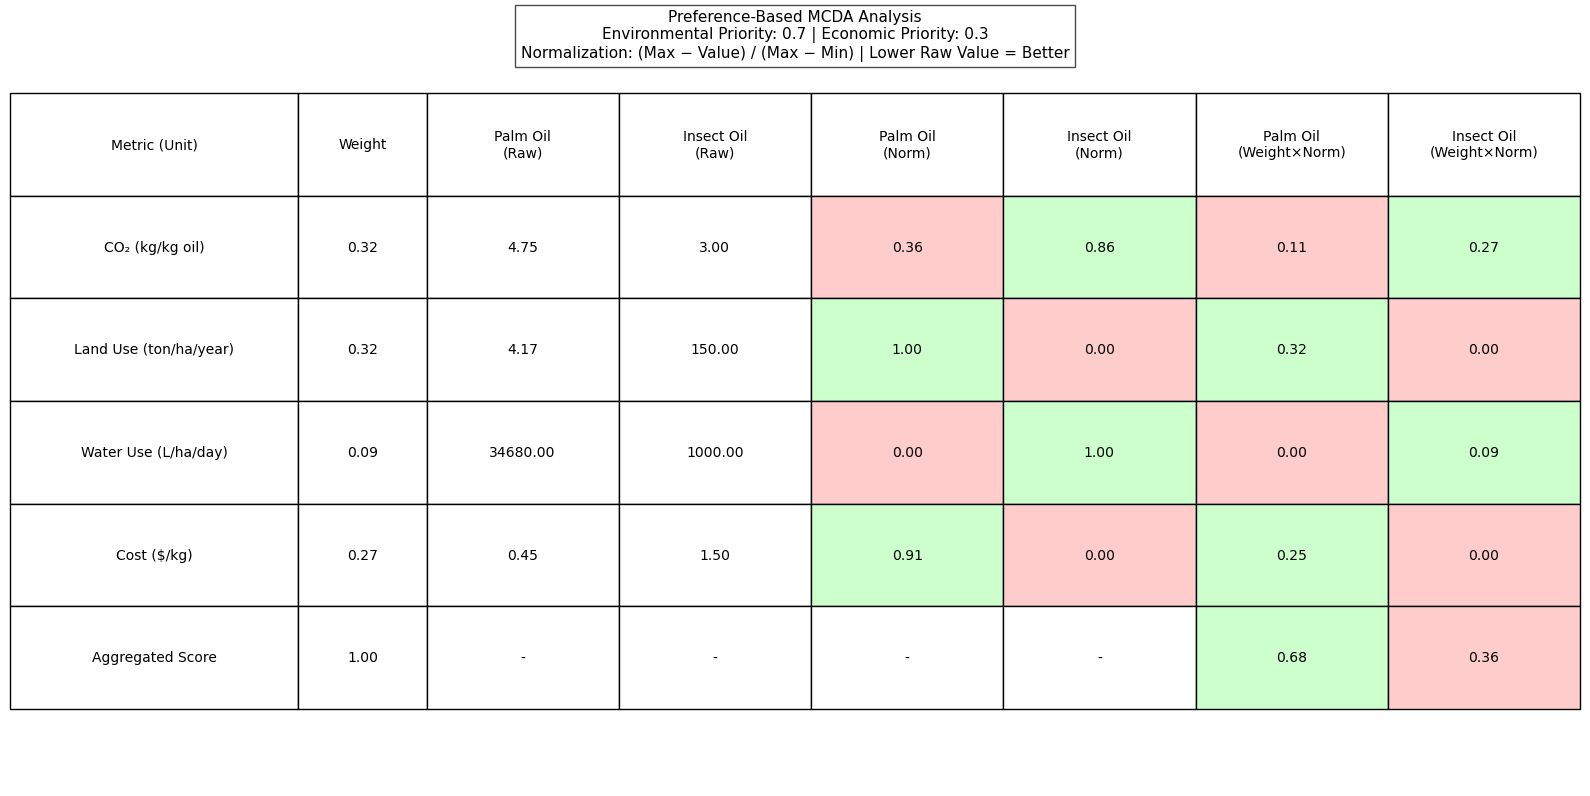


Scenario 2: Balanced Weights (0.5)
Plot saved as: output_plots/MCDA_Env0.5_Cost0.5.png


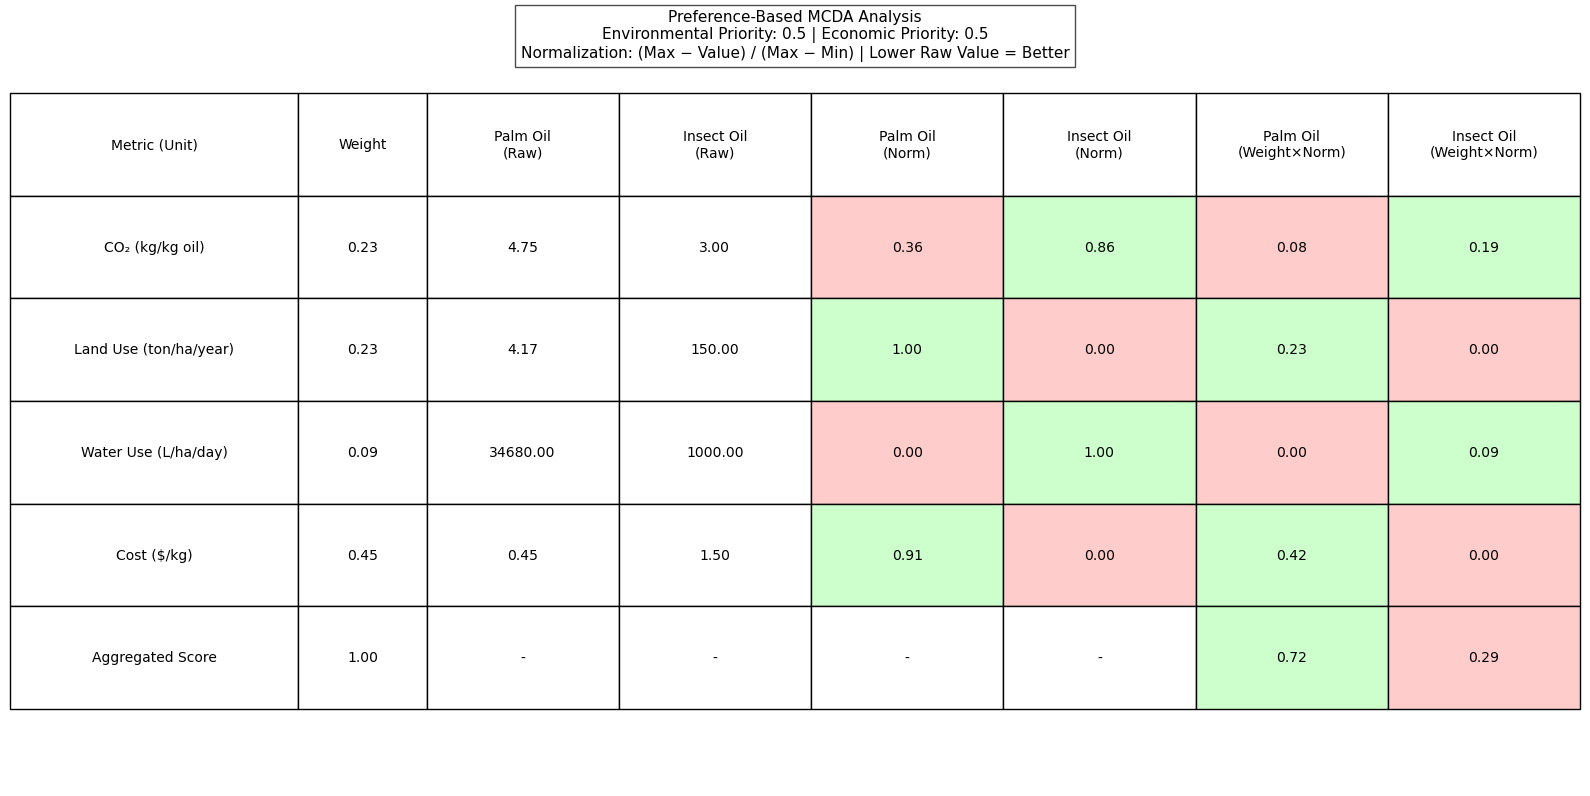


Scenario 3: High Economic Priority (0.3)
Plot saved as: output_plots/MCDA_Env0.3_Cost0.7.png


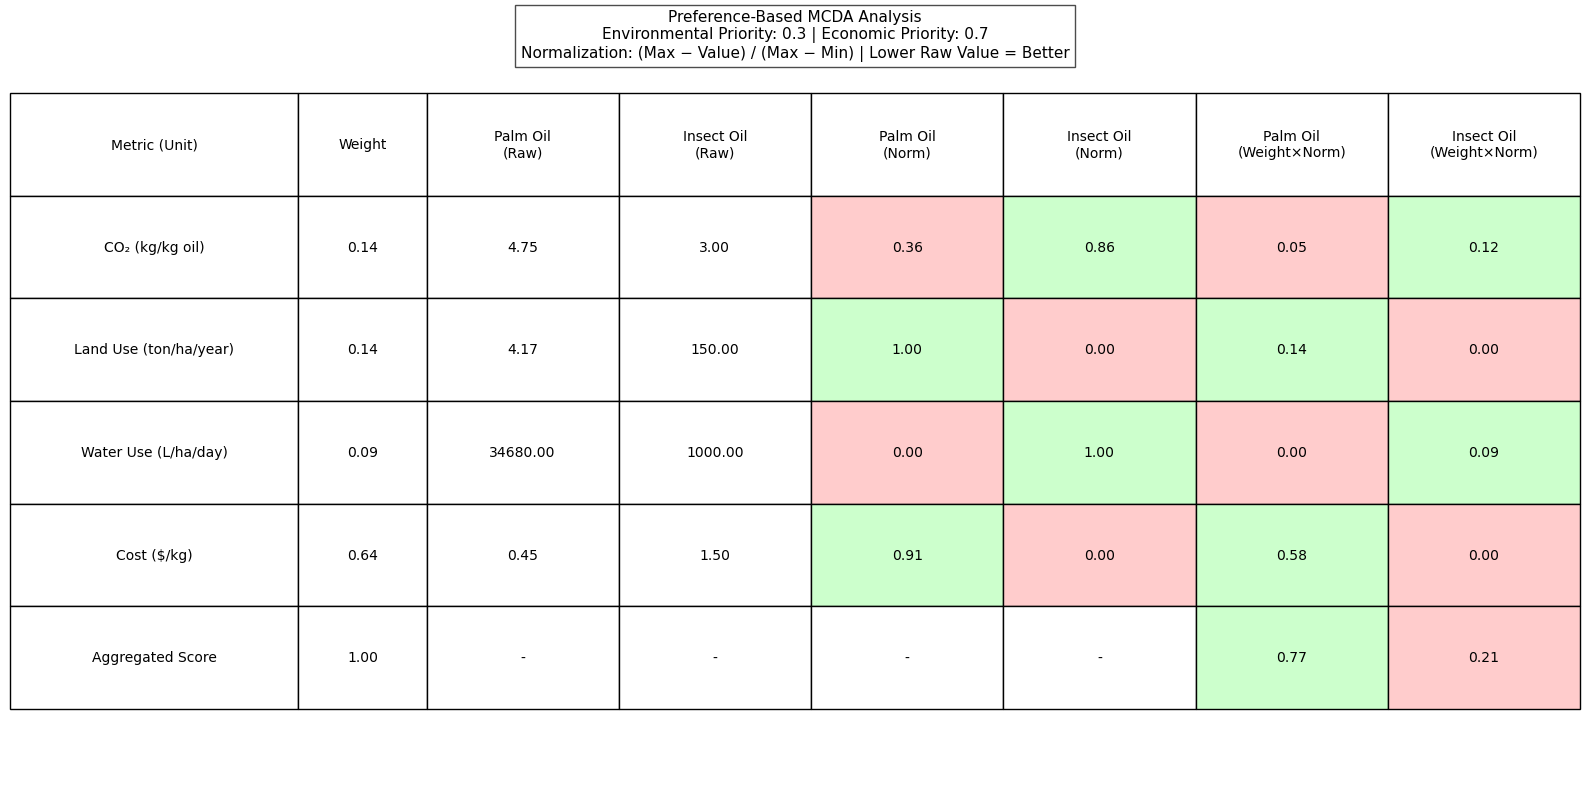


High Environmental Priority:


C:\Users\u0135744\AppData\Local\Temp\ipykernel_10360\1155825991.py:263: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Plot saved to: output_plots/MCDA_Env0.7_Cost0.3.png


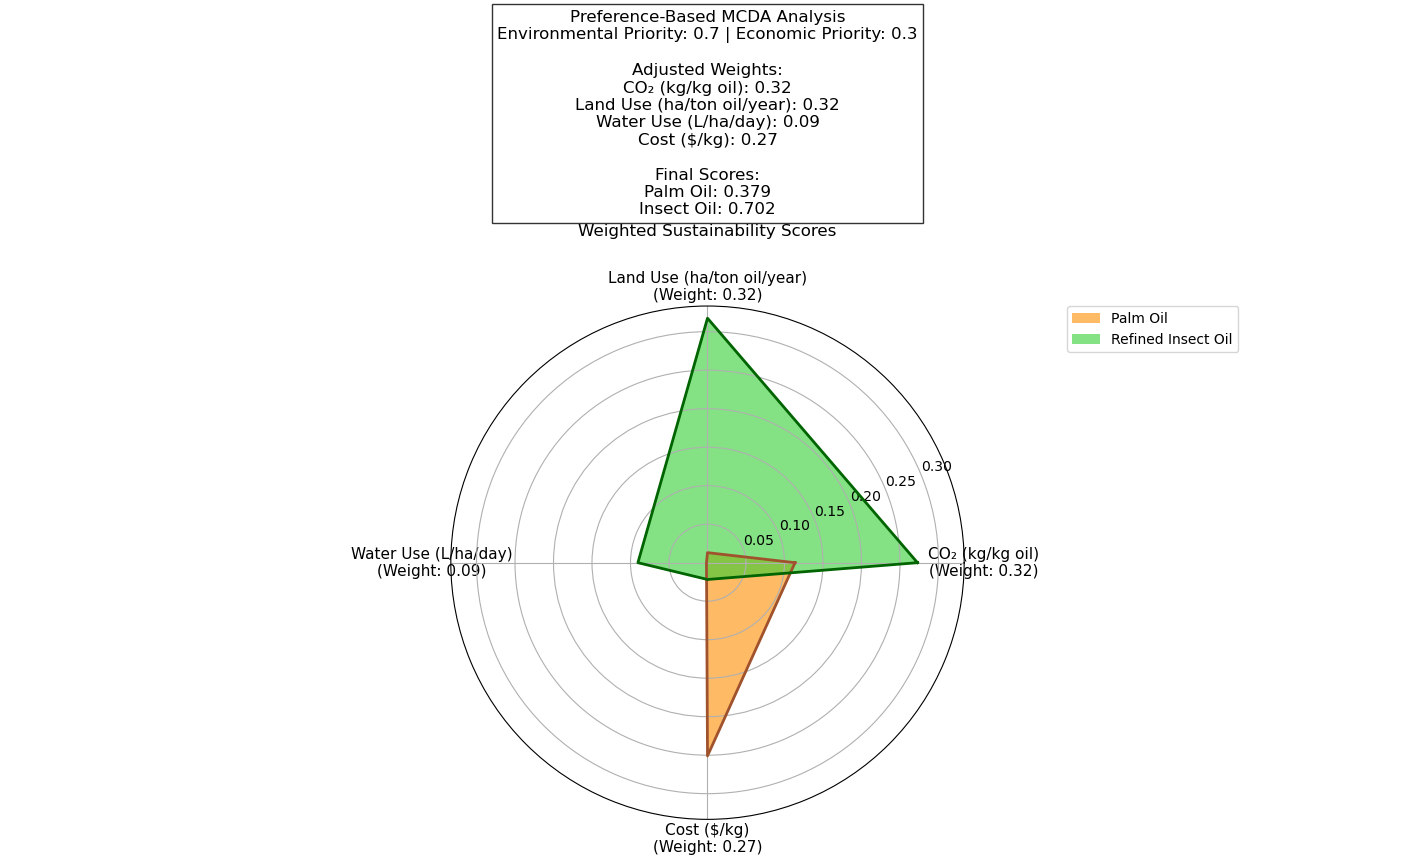


Balanced Weights:


C:\Users\u0135744\AppData\Local\Temp\ipykernel_10360\1155825991.py:263: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Plot saved to: output_plots/MCDA_Env0.5_Cost0.5.png


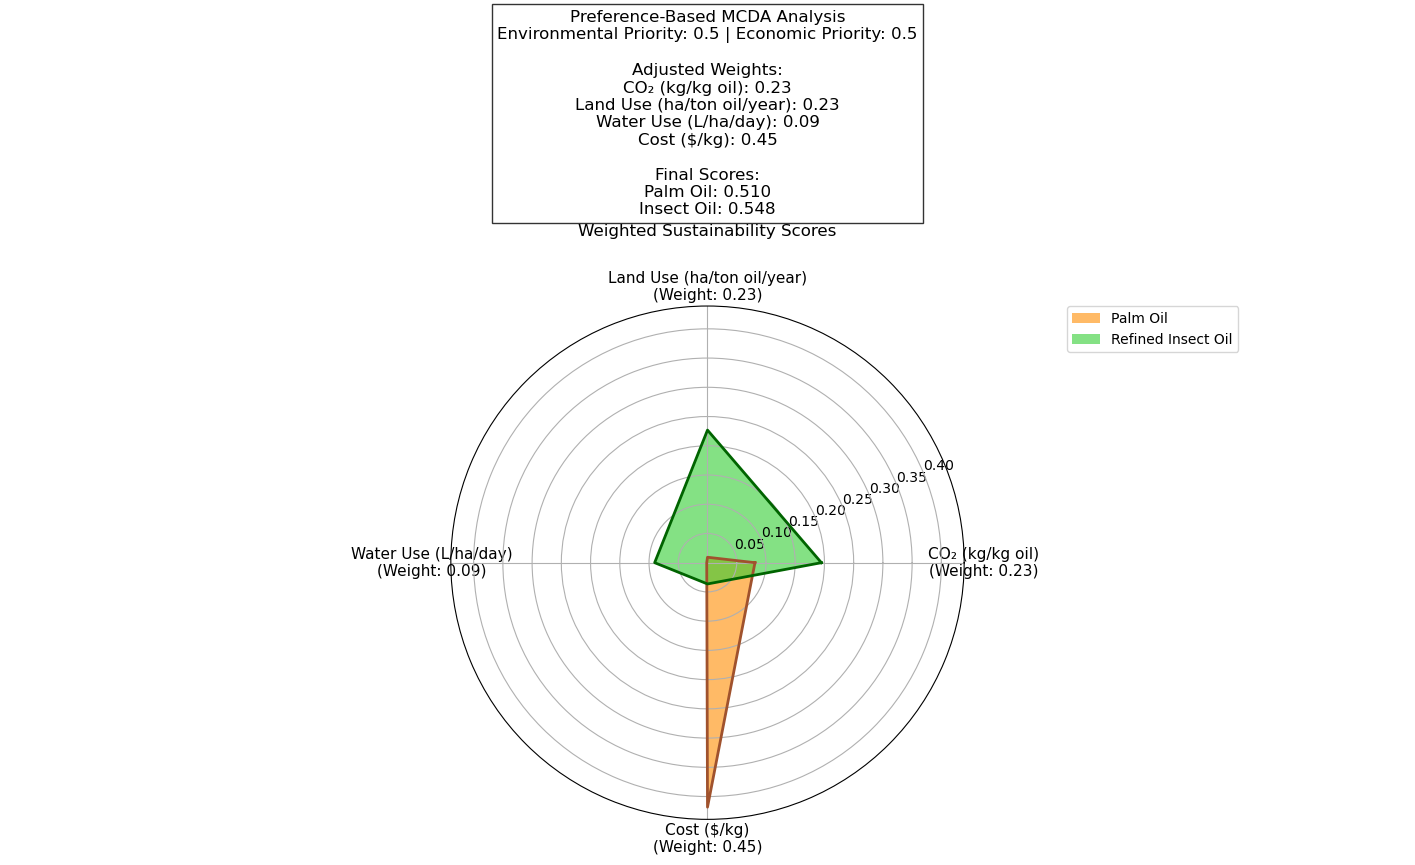


High Economic Priority:


C:\Users\u0135744\AppData\Local\Temp\ipykernel_10360\1155825991.py:263: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Plot saved to: output_plots/MCDA_Env0.3_Cost0.7.png


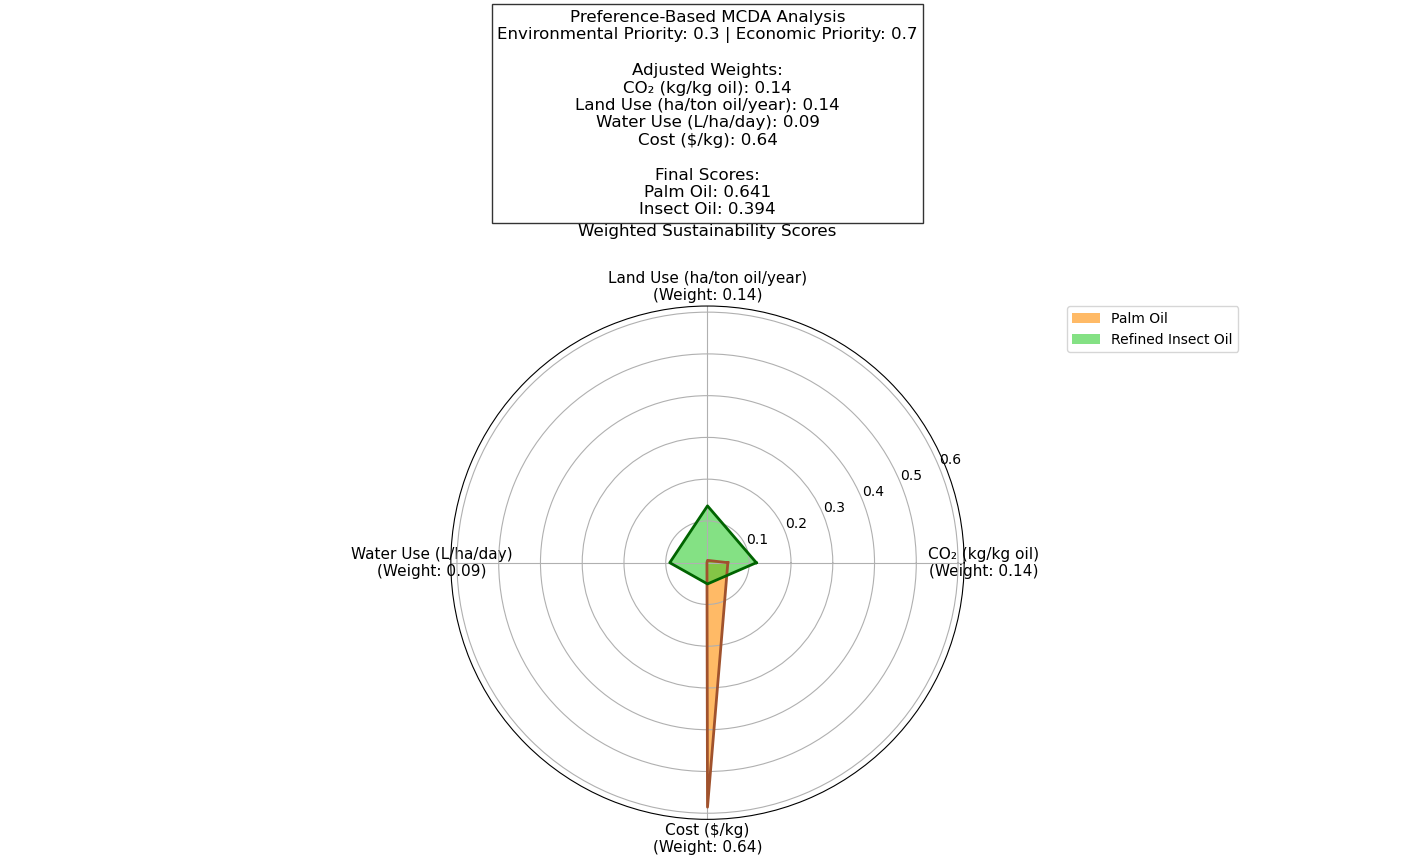

In [5]:
#method 3 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table
import os

# --- Data Definitions ---
data_ranges = {
    "Palm Oil": {
        "CO₂ (kg/kg oil)": (3.5, 6.0),
        "Land Use (ton/ha/year)": (4.17, 4.17),
        "Water Use (L/ha/day)": (34680, 34680),
        "Cost ($/kg)": (0.35, 0.55)
    },
    "Refined Insect Oil": {
        "CO₂ (kg/kg oil)": (2.5, 3.5),
        "Land Use (ton/ha/year)": (150, 150),
        "Water Use (L/ha/day)": (1000, 1000),
        "Cost ($/kg)": (1.50, 1.50)
    }
}

# Mid-points for calculations
data_mid = {
    oil_type: {metric: np.mean(values) for metric, values in data_ranges[oil_type].items()}
    for oil_type in data_ranges
}

# --- MCDA Analysis ---
def run_mcda(env_weight=0.7, cost_weight=0.3):
    # Calculate weights
    weights = {
        "CO₂ (kg/kg oil)": env_weight * 0.5,
        "Land Use (ton/ha/year)": env_weight * 0.5,
        "Water Use (L/ha/day)": 0.1,
        "Cost ($/kg)": cost_weight
    }
    total = sum(weights.values())
    weights = {k: v / total for k, v in weights.items()}
    
    # Normalize data (lower raw value = better)
    global_min = {m: min(data_ranges["Palm Oil"][m][0], data_ranges["Refined Insect Oil"][m][0]) 
                  for m in data_ranges["Palm Oil"]}
    global_max = {m: max(data_ranges["Palm Oil"][m][1], data_ranges["Refined Insect Oil"][m][1]) 
                  for m in data_ranges["Palm Oil"]}
    
    normalized_data = {
        oil_type: {
            metric: (global_max[metric] - data_mid[oil_type][metric]) / 
                   (global_max[metric] - global_min[metric]) 
            if global_max[metric] != global_min[metric] else 0.5
            for metric in data_mid[oil_type]
        }
        for oil_type in data_mid
    }
    
    # Calculate weighted scores
    weighted_data = {
        oil_type: {
            metric: normalized_data[oil_type][metric] * weights[metric]
            for metric in normalized_data[oil_type]
        }
        for oil_type in normalized_data
    }
    
    scores = {
        oil_type: sum(weighted_data[oil_type].values())
        for oil_type in weighted_data
    }
    
    return weights, normalized_data, weighted_data, scores

# --- Generate Table ---
def create_mcda_table(env_weight=0.7, cost_weight=0.3):
    weights, normalized_data, weighted_data, scores = run_mcda(env_weight, cost_weight)
    
    # Prepare table data
    table_data = [
        ["Metric (Unit)", "Weight", "Palm Oil\n(Raw)", "Insect Oil\n(Raw)", 
         "Palm Oil\n(Norm)", "Insect Oil\n(Norm)", "Palm Oil\n(Weight×Norm)", "Insect Oil\n(Weight×Norm)"]
    ]
    
    for metric in weights:
        table_data.append([
            metric,
            f"{weights[metric]:.2f}",
            f"{data_mid['Palm Oil'][metric]:.2f}",
            f"{data_mid['Refined Insect Oil'][metric]:.2f}",
            f"{normalized_data['Palm Oil'][metric]:.2f}",
            f"{normalized_data['Refined Insect Oil'][metric]:.2f}",
            f"{weighted_data['Palm Oil'][metric]:.2f}",
            f"{weighted_data['Refined Insect Oil'][metric]:.2f}"
        ])
    
    table_data.append(["Aggregated Score", "1.00", "-", "-", "-", "-", 
                       f"{scores['Palm Oil']:.2f}", f"{scores['Refined Insect Oil']:.2f}"])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.axis('off')
    
    # Add header
    header_text = (
        f"Preference-Based MCDA Analysis\n"
        f"Environmental Priority: {env_weight:.1f} | Economic Priority: {cost_weight:.1f}\n"
        "Normalization: (Max − Value) / (Max − Min) | Lower Raw Value = Better"
    )
    plt.figtext(0.5, 0.93, header_text, ha='center', fontsize=11, 
                bbox=dict(facecolor='white', alpha=0.7))
    
    # Create table
    table = ax.table(
        cellText=table_data,
        cellLoc='center',
        loc='center',
        bbox=[0, 0.1, 1, 0.8],
        colWidths=[0.18, 0.08, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12]
    )
    
    # Color coding
    for row in range(1, len(table_data)-1):
        # Normalized values
        palm_norm = float(table_data[row][4])
        insect_norm = float(table_data[row][5])
        table[(row, 4)].set_facecolor('#FFCCCC' if palm_norm < insect_norm else '#CCFFCC')
        table[(row, 5)].set_facecolor('#FFCCCC' if insect_norm < palm_norm else '#CCFFCC')
        # Weighted values
        palm_weighted = float(table_data[row][6])
        insect_weighted = float(table_data[row][7])
        table[(row, 6)].set_facecolor('#FFCCCC' if palm_weighted < insect_weighted else '#CCFFCC')
        table[(row, 7)].set_facecolor('#FFCCCC' if insect_weighted < palm_weighted else '#CCFFCC')
    
    # Highlight winner
    winner = 'Palm Oil' if scores['Palm Oil'] > scores['Refined Insect Oil'] else 'Refined Insect Oil'
    table[(len(table_data)-1, 6)].set_facecolor('#CCFFCC' if winner == 'Palm Oil' else '#FFCCCC')
    table[(len(table_data)-1, 7)].set_facecolor('#CCFFCC' if winner == 'Refined Insect Oil' else '#FFCCCC')
    
    # Formatting
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    for key, cell in table.get_celld().items():
        cell.set_height(0.08)
        cell.set_text_props(ha='center', va='center', wrap=True)
    
    plt.tight_layout()
    
    # Create output directory if it doesn't exist
    os.makedirs('output_plots', exist_ok=True)
    
    # Save the plot with a descriptive filename
    filename = f"output_plots/MCDA_Env{env_weight}_Cost{cost_weight}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"Plot saved as: {filename}")
    
    plt.show()

# --- Run with different weight scenarios ---
print("Scenario 1: High Environmental Priority (0.7)")
create_mcda_table(env_weight=0.7, cost_weight=0.3)

print("\nScenario 2: Balanced Weights (0.5)")
create_mcda_table(env_weight=0.5, cost_weight=0.5)

print("\nScenario 3: High Economic Priority (0.3)")
create_mcda_table(env_weight=0.3, cost_weight=0.7)
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Data Definitions with Ranges ---
data_ranges = {
    "Palm Oil": {
        "CO₂ (kg/kg oil)": (3.5, 6.0),  # Range
        "Land Use (ha/ton oil/year)": (0.23, 0.25),  # Range (~4.17 ton/ha/year)
        "Water Use (L/ha/day)": (34000, 35000),  # Range
        "Cost ($/kg)": (0.35, 0.55)  # Range
    },
    "Refined Insect Oil": {
        "CO₂ (kg/kg oil)": (2.5, 3.5),  # Range
        "Land Use (ha/ton oil/year)": (0.006, 0.007),  # Range (~150 ton/ha/year)
        "Water Use (L/ha/day)": (800, 1200),  # Range
        "Cost ($/kg)": (1.40, 1.60)  # Range
    }
}

# Calculate midpoints for visualization
data_mid = {
    oil: {metric: np.mean(values) for metric, values in data_ranges[oil].items()}
    for oil in data_ranges
}

metrics = list(data_ranges["Palm Oil"].keys())

# --- MCDA Functions ---
def normalize(value, min_val, max_val):
    return (max_val - value) / (max_val - min_val) if max_val != min_val else 0.5

def create_mcda_plot(env_weight=0.7, cost_weight=0.3, save_plot=False):
    # Calculate weights
    weights = {
        "CO₂ (kg/kg oil)": env_weight * 0.5,
        "Land Use (ha/ton oil/year)": env_weight * 0.5,
        "Water Use (L/ha/day)": 0.1,
        "Cost ($/kg)": cost_weight
    }
    total = sum(weights.values())
    weights = {k: v/total for k,v in weights.items()}
    
    # Normalize data
    global_min = {m: min(data_ranges["Palm Oil"][m][0], data_ranges["Refined Insect Oil"][m][0]) for m in metrics}
    global_max = {m: max(data_ranges["Palm Oil"][m][1], data_ranges["Refined Insect Oil"][m][1]) for m in metrics}
    
    normalized = {
        oil: {m: normalize(data_mid[oil][m], global_min[m], global_max[m]) for m in metrics}
        for oil in data_ranges
    }
    
    # Calculate scores
    scores = {
        oil: sum(normalized[oil][m] * weights[m] for m in metrics)
        for oil in data_ranges
    }
    
    # Create figure with adjusted layout
    fig = plt.figure(figsize=(18, 10))
    gs = fig.add_gridspec(2, 1, height_ratios=[1, 4], hspace=0.4)
    
    # Text box
    ax_text = fig.add_subplot(gs[0])
    ax_text.axis('off')
    text_content = (
        f"Preference-Based MCDA Analysis\n"
        f"Environmental Priority: {env_weight:.1f} | Economic Priority: {cost_weight:.1f}\n\n"
        f"Adjusted Weights:\n" +
        "\n".join([f"{m}: {weights[m]:.2f}" for m in metrics]) +
        f"\n\nFinal Scores:\nPalm Oil: {scores['Palm Oil']:.3f}\nInsect Oil: {scores['Refined Insect Oil']:.3f}"
    )
    ax_text.text(0.5, 0.5, text_content, ha='center', va='center', fontsize=12,
                bbox=dict(facecolor='white', alpha=0.8))
    
    # Radar plot with legend outside
    ax = fig.add_subplot(gs[1], polar=True)
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]
    
    colors = {
        "Palm Oil": {"fill": "darkorange", "line": "sienna"},
        "Refined Insect Oil": {"fill": "limegreen", "line": "darkgreen"}
    }
    
    for oil in data_ranges:
        values = [weights[m] * normalized[oil][m] for m in metrics] + [weights[metrics[0]] * normalized[oil][metrics[0]]]
        ax.fill(angles, values, colors[oil]["fill"], alpha=0.6, label=oil)
        ax.plot(angles, values, color=colors[oil]["line"], linewidth=2)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([f"{m}\n(Weight: {weights[m]:.2f})" for m in metrics], fontsize=11)
    ax.set_title("Weighted Sustainability Scores", pad=25)
    
    # Move legend outside the plot
    ax.legend(bbox_to_anchor=(1.2, 1), loc='upper left', borderaxespad=0.)
    
    plt.tight_layout()
    
    # Save plot if requested
    if save_plot:
        os.makedirs('output_plots', exist_ok=True)
        filename = f"output_plots/MCDA_Env{env_weight}_Cost{cost_weight}.png"
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {filename}")
    
    plt.show()

# --- Run analysis for different scenarios ---
scenarios = [
    {"env_weight": 0.7, "cost_weight": 0.3, "name": "High Environmental Priority"},
    {"env_weight": 0.5, "cost_weight": 0.5, "name": "Balanced Weights"},
    {"env_weight": 0.3, "cost_weight": 0.7, "name": "High Economic Priority"}
]

for scenario in scenarios:
    print(f"\n{scenario['name']}:")
    create_mcda_plot(
        env_weight=scenario['env_weight'],
        cost_weight=scenario['cost_weight'],
        save_plot=True
    )





In [2]:
"""
SUSTAINABILITY ASSESSMENT - ORIGINAL UNMODIFIED METHODOLOGIES
Three original methodologies provided by the user
Maintained exactly as originally written
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.table import Table
import os
from pathlib import Path

# =============================================
# METHODOLOGY 1: ORIGINAL UNMODIFIED
# =============================================

def methodology_1_original(output_dir):
    """Original code for basic comparison visualization"""
    # Data from tables
    data = [
        ["Parameter", "Palm Oil", "Refined Insect Oil"],
        ["CO₂ Emissions", "~3.5–6.0 kg CO₂ per kg oil", "~2.5–3.5 kg CO₂ per kg oil"],
        ["Land Use", "~4.17 tons oil/ha/year", "Up to 150 tons oil/ha/year (~38× more efficient)"],
        ["Water Use", "~34,680 liters/ha/day", "Significantly lower (most water from feed)"],
        ["Cost per kg", "~$0.35–$0.55 per kg", "Higher (currently not well established, expected to decrease with scale)"]
    ]

    # Create figure
    plt.figure(figsize=(16, 12))
    
    # Table Visualization
    plt.subplot(221)
    ax = plt.gca()
    ax.axis('off')
    ax.axis('tight')
    
    table = ax.table(cellText=data[1:],
                    colLabels=data[0],
                    loc='center',
                    cellLoc='left',
                    colColours=['#f8f9fa']*3)
    
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.8)
    plt.title('Sustainability Metrics Comparison with Ranges', pad=20, fontweight='bold')
    
    # Color settings
    header_color = '#2c3e50'
    palm_color = '#fadbd8'
    insect_color = '#d5f5e3'
    
    # Apply colors
    for (i, j), cell in table.get_celld().items():
        if i == 0:
            cell.set_facecolor(header_color)
            cell.set_text_props(color='white', weight='bold')
        elif j == 0:
            cell.set_facecolor('#eaf2f8')
        elif j == 1:
            cell.set_facecolor(palm_color)
        elif j == 2:
            cell.set_facecolor(insect_color)
        cell.set_edgecolor('#dddddd')
    
    # Quantitative comparison chart
    plt.subplot(222)
    parameters = [row[0] for row in data[1:]]
    palm_values = [4.75, 4.17, 34680, 0.45]  # Midpoints
    insect_values = [3.0, 150, 1000, 3.0]    # Representative values
    
    # Normalize
    max_values = [max(p,i) for p,i in zip(palm_values, insect_values)]
    palm_normalized = [v/m for v,m in zip(palm_values, max_values)]
    insect_normalized = [v/m for v,m in zip(insect_values, max_values)]
    
    x = np.arange(len(parameters))
    width = 0.35
    bars1 = plt.bar(x - width/2, palm_normalized, width, label='Palm Oil', color='#e74c3c')
    bars2 = plt.bar(x + width/2, insect_normalized, width, label='Insect Oil', color='#2ecc71')
    
    plt.title('Normalized Metric Comparison\n(Lower Values = Better)', fontweight='bold')
    plt.ylabel('Normalized Value')
    plt.xticks(x, parameters, rotation=45, ha='right')
    plt.legend()
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}',
                    ha='center', va='bottom', fontsize=8)
    
    # Radar Chart
    plt.subplot(212, polar=True)
    angles = np.linspace(0, 2*np.pi, len(parameters), endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))
    palm_normalized_radar = np.concatenate((palm_normalized, [palm_normalized[0]]))
    insect_normalized_radar = np.concatenate((insect_normalized, [insect_normalized[0]]))
    parameters_radar = parameters + [parameters[0]]
    
    ax = plt.subplot(212, polar=True)
    ax.plot(angles, palm_normalized_radar, 'o-', linewidth=2, label='Palm Oil', color='#e74c3c')
    ax.fill(angles, palm_normalized_radar, color='#e74c3c', alpha=0.25)
    ax.plot(angles, insect_normalized_radar, 'o-', linewidth=2, label='Insect Oil', color='#2ecc71')
    ax.fill(angles, insect_normalized_radar, color='#2ecc71', alpha=0.25)
    
    ax.set_thetagrids(angles * 180/np.pi, parameters_radar)
    ax.set_title('Comprehensive Sustainability Profile\n(Closer to center = better performance)', y=1.1, fontweight='bold')
    ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(["20%", "40%", "60%", "80%", "100%"])
    ax.set_ylim(0, 1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    
    plt.tight_layout()
    
    # Save plot
    output_path = Path(output_dir) / "Methodology_1_Basic_Comparison.png"
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"Saved Methodology 1 results to: {output_path}")
    plt.close()

# =============================================
# METHODOLOGY 2: ORIGINAL UNMODIFIED
# =============================================

def methodology_2_original(output_dir):
    """Original code for weighted normalized scoring"""
    # Data definitions
    data_ranges = {
        "Palm Oil": {
            "CO₂ (kg/kg oil)": (3.5, 6.0),
            "Land Use (ha/ton oil/year)": (1/4.17, 1/4.17),
            "Water Use (L/ha/day)": (34680, 34680),
            "Cost ($/kg)": (0.35, 0.55)
        },
        "Refined Insect Oil": {
            "CO₂ (kg/kg oil)": (2.5, 3.5),
            "Land Use (ha/ton oil/year)": (1/150, 1/150),
            "Water Use (L/ha/day)": (1000, 1000),
            "Cost ($/kg)": (1.50, 1.50)
        }
    }
    
    # Mid-points
    data_mid = {
        oil: {metric: np.mean(values) for metric, values in data_ranges[oil].items()}
        for oil in data_ranges
    }
    
    # Normalization function
    def normalize(value, min_val, max_val):
        return (max_val - value) / (max_val - min_val)
    
    # Global min/max
    global_min = {metric: min(data_ranges["Palm Oil"][metric][0], 
                  data_ranges["Refined Insect Oil"][metric][0]) 
                  for metric in data_ranges["Palm Oil"]}
    
    global_max = {metric: max(data_ranges["Palm Oil"][metric][1], 
                  data_ranges["Refined Insect Oil"][metric][1]) 
                  for metric in data_ranges["Palm Oil"]}
    
    # Normalized data
    normalized_data = {
        oil: {metric: normalize(data_mid[oil][metric], global_min[metric], global_max[metric]) 
              for metric in data_mid[oil]}
        for oil in data_mid
    }
    
    # Weights
    weights = {
        "CO₂ (kg/kg oil)": 0.3,
        "Land Use (ha/ton oil/year)": 0.3,
        "Water Use (L/ha/day)": 0.2,
        "Cost ($/kg)": 0.2
    }
    
    # Weighted data
    weighted_data = {
        oil: {metric: normalized_data[oil][metric] * weights[metric] 
              for metric in normalized_data[oil]}
        for oil in normalized_data
    }
    
    scores = {oil: sum(weighted_data[oil].values()) for oil in weighted_data}
    
    # Create table data
    table_data = [
        ["Metric (Unit)", "Weight", "Palm Oil\n(Raw)", "Insect Oil\n(Raw)", 
         "Palm Oil\n(Norm)", "Insect Oil\n(Norm)", "Palm Oil\n(Weight×Norm)", "Insect Oil\n(Weight×Norm)"]
    ]
    for metric in weights:
        table_data.append([
            metric,
            f"{weights[metric]:.2f}",
            f"{data_mid['Palm Oil'][metric]:.2f}",
            f"{data_mid['Refined Insect Oil'][metric]:.2f}",
            f"{normalized_data['Palm Oil'][metric]:.2f}",
            f"{normalized_data['Refined Insect Oil'][metric]:.2f}",
            f"{weighted_data['Palm Oil'][metric]:.2f}",
            f"{weighted_data['Refined Insect Oil'][metric]:.2f}"
        ])
    table_data.append(["Aggregated Score", "1.00", "-", "-", "-", "-", 
                      f"{scores['Palm Oil']:.2f}", f"{scores['Refined Insect Oil']:.2f}"])
    
    # Plot table
    fig, ax = plt.subplots(figsize=(16, 8))
    ax.axis('off')
    
    # Add formula explanation
    formula_note = (
        "Normalization Formula (lower raw value = better):\n"
        "Norm = (Max − Raw Value) / (Max − Min)\n"
        "Weighted Score = Weight × Norm | Aggregated Score = Σ(Weight × Norm)"
    )
    plt.figtext(0.5, 0.93, formula_note, ha='center', va='center', fontsize=11, 
                bbox=dict(facecolor='white', alpha=0.5))
    
    # Create table
    table = ax.table(
        cellText=table_data,
        colLabels=None,
        cellLoc='center',
        loc='center',
        bbox=[0, 0.1, 1, 0.9],
        colWidths=[0.18, 0.08, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12]
    )
    
    # Color cells
    for row in range(1, len(table_data)-1):
        palm_norm = float(table_data[row][4])
        insect_norm = float(table_data[row][5])
        table[(row, 4)].set_facecolor('#FFCCCC' if palm_norm < insect_norm else '#CCFFCC')
        table[(row, 5)].set_facecolor('#FFCCCC' if insect_norm < palm_norm else '#CCFFCC')
        
        palm_weighted = float(table_data[row][6])
        insect_weighted = float(table_data[row][7])
        table[(row, 6)].set_facecolor('#FFCCCC' if palm_weighted < insect_weighted else '#CCFFCC')
        table[(row, 7)].set_facecolor('#FFCCCC' if insect_weighted < palm_weighted else '#CCFFCC')
    
    # Highlight aggregated scores
    table[(len(table_data)-1, 6)].set_facecolor('#CCFFCC')
    table[(len(table_data)-1, 7)].set_facecolor('#FFCCCC')
    
    # Formatting
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    for key, cell in table.get_celld().items():
        cell.set_height(0.08)
        cell.set_text_props(ha='center', va='center', wrap=True)
    
    plt.tight_layout()
    
    # Save plot
    output_path = Path(output_dir) / "Methodology_2_Weighted_Scoring.png"
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"Saved Methodology 2 results to: {output_path}")
    plt.close()

# =============================================
# METHODOLOGY 3: ORIGINAL UNMODIFIED
# =============================================

def methodology_3_original(output_dir):
    """Original code for preference-based MCDA analysis"""
    # Data definitions
    data_ranges = {
        "Palm Oil": {
            "CO₂ (kg/kg oil)": (3.5, 6.0),
            "Land Use (ton/ha/year)": (4.17, 4.17),
            "Water Use (L/ha/day)": (34680, 34680),
            "Cost ($/kg)": (0.35, 0.55)
        },
        "Refined Insect Oil": {
            "CO₂ (kg/kg oil)": (2.5, 3.5),
            "Land Use (ton/ha/year)": (150, 150),
            "Water Use (L/ha/day)": (1000, 1000),
            "Cost ($/kg)": (1.50, 1.50)
        }
    }
    
    # MCDA Analysis function
    def run_mcda(env_weight=0.7, cost_weight=0.3):
        # Calculate weights
        weights = {
            "CO₂ (kg/kg oil)": env_weight * 0.5,
            "Land Use (ton/ha/year)": env_weight * 0.5,
            "Water Use (L/ha/day)": 0.1,
            "Cost ($/kg)": cost_weight
        }
        total = sum(weights.values())
        weights = {k: v / total for k, v in weights.items()}
        
        # Normalize data
        global_min = {m: min(data_ranges["Palm Oil"][m][0], data_ranges["Refined Insect Oil"][m][0]) 
                      for m in data_ranges["Palm Oil"]}
        global_max = {m: max(data_ranges["Palm Oil"][m][1], data_ranges["Refined Insect Oil"][m][1]) 
                      for m in data_ranges["Palm Oil"]}
        
        normalized_data = {
            oil_type: {
                metric: (global_max[metric] - np.mean(data_ranges[oil_type][metric])) / 
                       (global_max[metric] - global_min[metric]) 
                if global_max[metric] != global_min[metric] else 0.5
                for metric in data_ranges[oil_type]
            }
            for oil_type in data_ranges
        }
        
        # Calculate weighted scores
        weighted_data = {
            oil_type: {
                metric: normalized_data[oil_type][metric] * weights[metric]
                for metric in normalized_data[oil_type]
            }
            for oil_type in normalized_data
        }
        
        scores = {
            oil_type: sum(weighted_data[oil_type].values())
            for oil_type in weighted_data
        }
        
        return weights, normalized_data, weighted_data, scores
    
    # Generate Table function
    def create_mcda_table(env_weight=0.7, cost_weight=0.3):
        weights, normalized_data, weighted_data, scores = run_mcda(env_weight, cost_weight)
        
        # Prepare table data
        table_data = [
            ["Metric (Unit)", "Weight", "Palm Oil\n(Raw)", "Insect Oil\n(Raw)", 
             "Palm Oil\n(Norm)", "Insect Oil\n(Norm)", "Palm Oil\n(Weight×Norm)", "Insect Oil\n(Weight×Norm)"]
        ]
        
        for metric in weights:
            table_data.append([
                metric,
                f"{weights[metric]:.2f}",
                f"{np.mean(data_ranges['Palm Oil'][metric]):.2f}",
                f"{np.mean(data_ranges['Refined Insect Oil'][metric]):.2f}",
                f"{normalized_data['Palm Oil'][metric]:.2f}",
                f"{normalized_data['Refined Insect Oil'][metric]:.2f}",
                f"{weighted_data['Palm Oil'][metric]:.2f}",
                f"{weighted_data['Refined Insect Oil'][metric]:.2f}"
            ])
        
        table_data.append(["Aggregated Score", "1.00", "-", "-", "-", "-", 
                           f"{scores['Palm Oil']:.2f}", f"{scores['Refined Insect Oil']:.2f}"])
        
        # Create figure
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.axis('off')
        
        # Add header
        header_text = (
            f"Preference-Based MCDA Analysis\n"
            f"Environmental Priority: {env_weight:.1f} | Economic Priority: {cost_weight:.1f}\n"
            "Normalization: (Max − Value) / (Max − Min) | Lower Raw Value = Better"
        )
        plt.figtext(0.5, 0.93, header_text, ha='center', fontsize=11, 
                    bbox=dict(facecolor='white', alpha=0.7))
        
        # Create table
        table = ax.table(
            cellText=table_data,
            cellLoc='center',
            loc='center',
            bbox=[0, 0.1, 1, 0.8],
            colWidths=[0.18, 0.08, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12]
        )
        
        # Color coding
        for row in range(1, len(table_data)-1):
            palm_norm = float(table_data[row][4])
            insect_norm = float(table_data[row][5])
            table[(row, 4)].set_facecolor('#FFCCCC' if palm_norm < insect_norm else '#CCFFCC')
            table[(row, 5)].set_facecolor('#FFCCCC' if insect_norm < palm_norm else '#CCFFCC')
            
            palm_weighted = float(table_data[row][6])
            insect_weighted = float(table_data[row][7])
            table[(row, 6)].set_facecolor('#FFCCCC' if palm_weighted < insect_weighted else '#CCFFCC')
            table[(row, 7)].set_facecolor('#FFCCCC' if insect_weighted < palm_weighted else '#CCFFCC')
        
        # Highlight winner
        winner = 'Palm Oil' if scores['Palm Oil'] > scores['Refined Insect Oil'] else 'Refined Insect Oil'
        table[(len(table_data)-1, 6)].set_facecolor('#CCFFCC' if winner == 'Palm Oil' else '#FFCCCC')
        table[(len(table_data)-1, 7)].set_facecolor('#CCFFCC' if winner == 'Refined Insect Oil' else '#FFCCCC')
        
        # Formatting
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        for key, cell in table.get_celld().items():
            cell.set_height(0.08)
            cell.set_text_props(ha='center', va='center', wrap=True)
        
        plt.tight_layout()
        
        # Save plot
        filename = f"MCDA_Env{env_weight}_Cost{cost_weight}.png"
        output_path = Path(output_dir) / filename
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        print(f"Saved {filename}")
        
        plt.close()
    
    # Run with different weight scenarios
    print("Scenario 1: High Environmental Priority (0.7)")
    create_mcda_table(env_weight=0.7, cost_weight=0.3)
    
    print("\nScenario 2: Balanced Weights (0.5)")
    create_mcda_table(env_weight=0.5, cost_weight=0.5)
    
    print("\nScenario 3: High Economic Priority (0.3)")
    create_mcda_table(env_weight=0.3, cost_weight=0.7)

# =============================================
# MAIN EXECUTION
# =============================================

if __name__ == "__main__":
    # Create output directory structure
    output_dir = Path("Sustainability_Analysis_Results_Original")
    output_dir.mkdir(exist_ok=True)
    
    # Create subdirectories for each methodology
    (output_dir / "Methodology_1_Basic_Comparison").mkdir(exist_ok=True)
    (output_dir / "Methodology_2_Weighted_Scoring").mkdir(exist_ok=True)
    (output_dir / "Methodology_3_MCDA_Analysis").mkdir(exist_ok=True)
    
    print("Running original unmodified methodologies...")
    
    # Run all original methodologies
    methodology_1_original(output_dir / "Methodology_1_Basic_Comparison")
    methodology_2_original(output_dir / "Methodology_2_Weighted_Scoring")
    methodology_3_original(output_dir / "Methodology_3_MCDA_Analysis")
    
    print("\nAll original methodologies executed successfully!")
    print("Results saved to:", output_dir.resolve())

Running original unmodified methodologies...
Saved Methodology 1 results to: Sustainability_Analysis_Results_Original\Methodology_1_Basic_Comparison\Methodology_1_Basic_Comparison.png
Saved Methodology 2 results to: Sustainability_Analysis_Results_Original\Methodology_2_Weighted_Scoring\Methodology_2_Weighted_Scoring.png
Scenario 1: High Environmental Priority (0.7)
Saved MCDA_Env0.7_Cost0.3.png

Scenario 2: Balanced Weights (0.5)
Saved MCDA_Env0.5_Cost0.5.png

Scenario 3: High Economic Priority (0.3)
Saved MCDA_Env0.3_Cost0.7.png

All original methodologies executed successfully!
Results saved to: C:\Users\u0135744\Sustainability_Analysis_Results_Original
